#### <h1> <center> ENSF 592 Programming Fundamentals for Data Engineers </center></h1>
<h2> <center> Assignment 8: Visualization (5 points)</center></h2>
<center>
<div class="alert alert-block alert-info">
Due: Dec 10 11:59PM. To be submitted on D2L.
</div></center>




Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis on the chicken and eggs data set presented in this video:  
https://youtu.be/j6ClFJhnG18?t=586

Watch the video. Note that the author uses R rather than Python.

The data set is unfortunately not available, so I have created one saved as chicken.csv. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting and which you prefer for what cases. Your oppinion is thought after.

Sections C. and D. are optional.
     

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data (4 pts)

### 0. read in the data 

In [2]:
# Your solution goes here
data = pd.read_csv("chicken.csv")
data

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
...,...,...,...,...,...
355,22,212,C,2966.5,4
356,22,176,C,3927.9,4
357,22,180,C,3361.6,5
358,22,193,C,3804.4,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [3]:
# Your solution goes here
#data['weight'].describe
data = pd.DataFrame(data)
data['weight'].groupby
data['weight'].describe 

<bound method NDFrame.describe of 0      3106.2
1      2891.7
2      2958.3
3      3188.7
4      3491.7
        ...  
355    2966.5
356    3927.9
357    3361.6
358    3804.4
359    4046.7
Name: weight, Length: 360, dtype: float64>

### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [4]:
# Your solution goes here
data['eggs'].groupby
data['eggs'].describe

<bound method NDFrame.describe of 0      4
1      5
2      4
3      5
4      5
      ..
355    4
356    4
357    5
358    5
359    3
Name: eggs, Length: 360, dtype: int64>

### 3.1 Histogram of age of chickens (Pandas hist())

Text(0.5, 0, 'Age of Chickens')

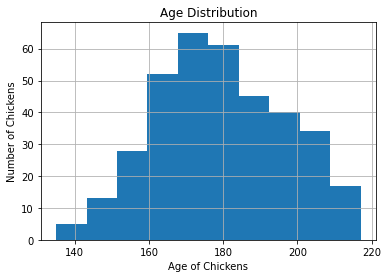

In [5]:
# Your solution goes here
df = pd.DataFrame(data)
df.hist(column = 'age')
plt.title('Age Distribution')
plt.ylabel('Number of Chickens')
plt.xlabel('Age of Chickens')

### 3.2 Histogram of age of chickens (Seaborn distplot())

/Users/kunjpatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age of Chickens')

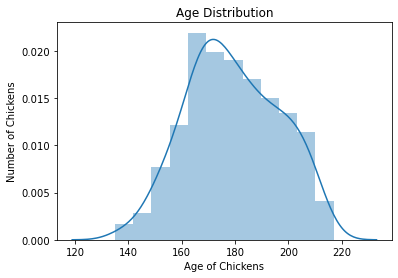

In [6]:
# Your solution goes here
df = pd.DataFrame(data)
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.ylabel('Number of Chickens')
plt.xlabel('Age of Chickens')

### 4.1 Boxplot age (Pandas boxplot())

([<matplotlib.axis.XTick at 0x7fb341038ac0>], [Text(1, 0, '')])

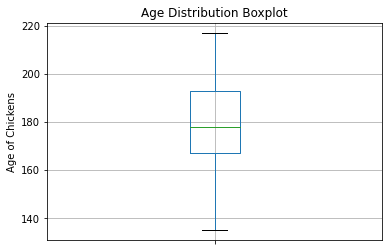

In [21]:
# Your solution goes here
df = pd.DataFrame(data)
df.boxplot(column=['age'])  
plt.title('Age Distribution Boxplot')
plt.ylabel('Age of Chickens')
plt.xticks([1], [''])

### 4.2 Boxplot age (Seaborn boxplot())

Text(0, 0.5, 'Age of Chickens')

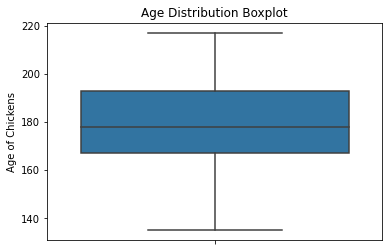

In [32]:
# Your solution goes here
df = pd.DataFrame(data)
sns.boxplot(y=df["age"])
plt.title('Age Distribution Boxplot')
plt.ylabel('Age of Chickens')

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

<AxesSubplot:xlabel='week'>

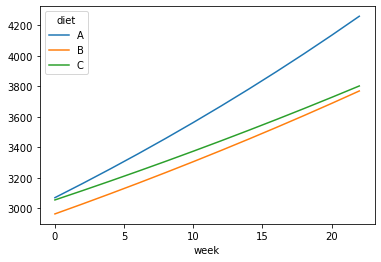

In [35]:
# Your solution goes here
fig, ax = plt.subplots()
data.groupby(['week','diet']).mean()['weight'].unstack().plot(ax=ax)


### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot:xlabel='week', ylabel='weight'>

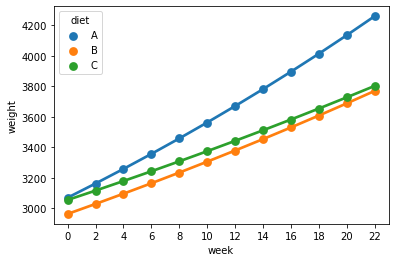

In [56]:
# Your solution goes here
sns.pointplot(x = 'week',  y = 'weight' , hue = 'diet', data = data , ci = None)


### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

<AxesSubplot:xlabel='week'>

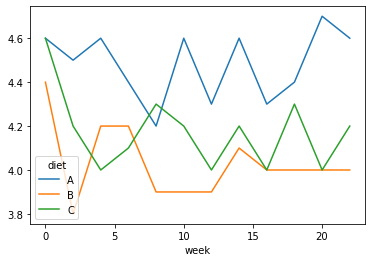

In [57]:
# Your solution goes here
fig, ax = plt.subplots()
data.groupby(['week','diet']).mean()['eggs'].unstack().plot(ax=ax)


### 6.2 plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

<AxesSubplot:xlabel='week', ylabel='eggs'>

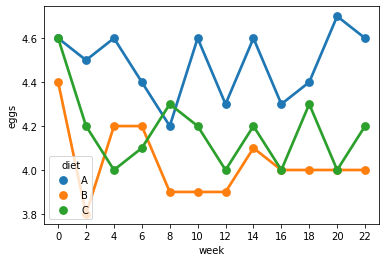

In [58]:
# Your solution goes here
sns.pointplot(x = 'week',  y = 'eggs' , hue = 'diet', data = data , ci = None)

### 7. Average age by diet stats (Pandas groupby())

In [64]:
# Your solution goes here
data[["diet", "age"]].groupby("diet").mean()

,age
diet,
A,166.5
B,187.9
C,183.4


### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


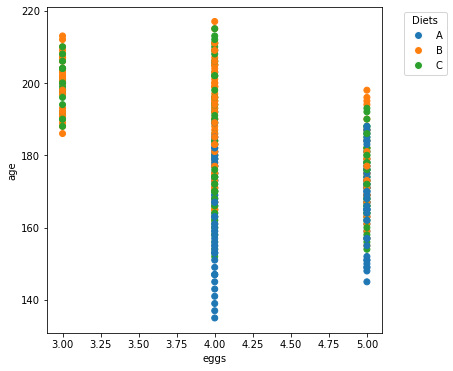

In [78]:
# Your solution goes here
from matplotlib.lines import Line2D  # for legend handle

fig, ax = plt.subplots(figsize=(6, 6))

diets = {'A':'tab:blue', 'B':'tab:orange', 'C':'tab:green'}

ax.scatter(df['eggs'], df['age'], c=df['diet'].map(diets))

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in diets.items()]
ax.legend(title='Diets', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('eggs')
plt.ylabel('age')


plt.show()

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


<AxesSubplot:xlabel='eggs', ylabel='age'>

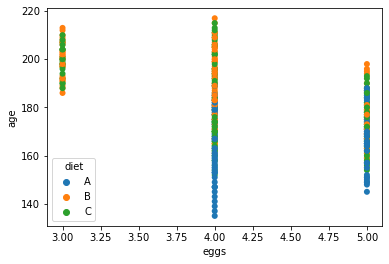

In [76]:
# Your solution goes here
sns.scatterplot(x='eggs', y='age', data=df, hue='diet', ec=None)

### 9.1 Boxplot age by diet (Pandas boxplot())

Text(0, 0.5, 'Age of Chickens')

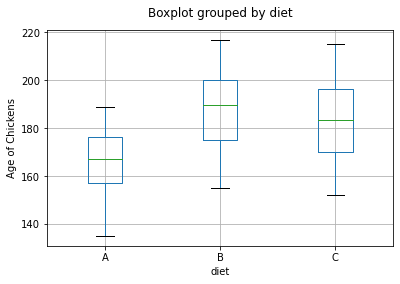

In [83]:
# Your solution goes here
boxplot = data.boxplot(column=['age'], by='diet')
plt.title('')
plt.ylabel('Age of Chickens')

### 9.2 Boxplot age by diet (Seaborn boxplot())

<AxesSubplot:xlabel='diet', ylabel='age'>

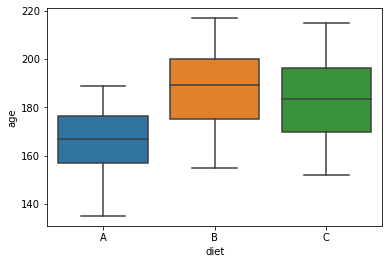

In [88]:
# Your solution goes here
sns.boxplot(data=df, x="diet", y="age")

## B. Reflection (1 pt)
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when seaborn?

**Your answers can go here:**
1.) Grouping data is harder in panda when using plot and groupby.
    Histograms are easier using Pandas vs Seaborn if data is not grouped
    Visuals require more code using Pandas 
    

2.) Pointplots are easiler using Seaborn.
    Scatter plots are much easier using Seaborn.
    Seaborn provides better visials. 
    Histograms require more code is data is not grouped but is much easier in Seaborn for grouped data. 
    
    
3.) Pandas are more useful to create DataFrames and manipulate data vs Seaborn which is more useful in creating           visuals.


